# Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Hugo Rocha

* __Rol__: 201610531-K

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scriptsm, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de red, green, blue) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
# librerias

import os
import numpy as np
from PIL import Image

In [2]:
gatito = Image.open(os.path.join("images", "gatito.png"))

Notar que la variable anterior es de una clase específica de la librería.

In [3]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

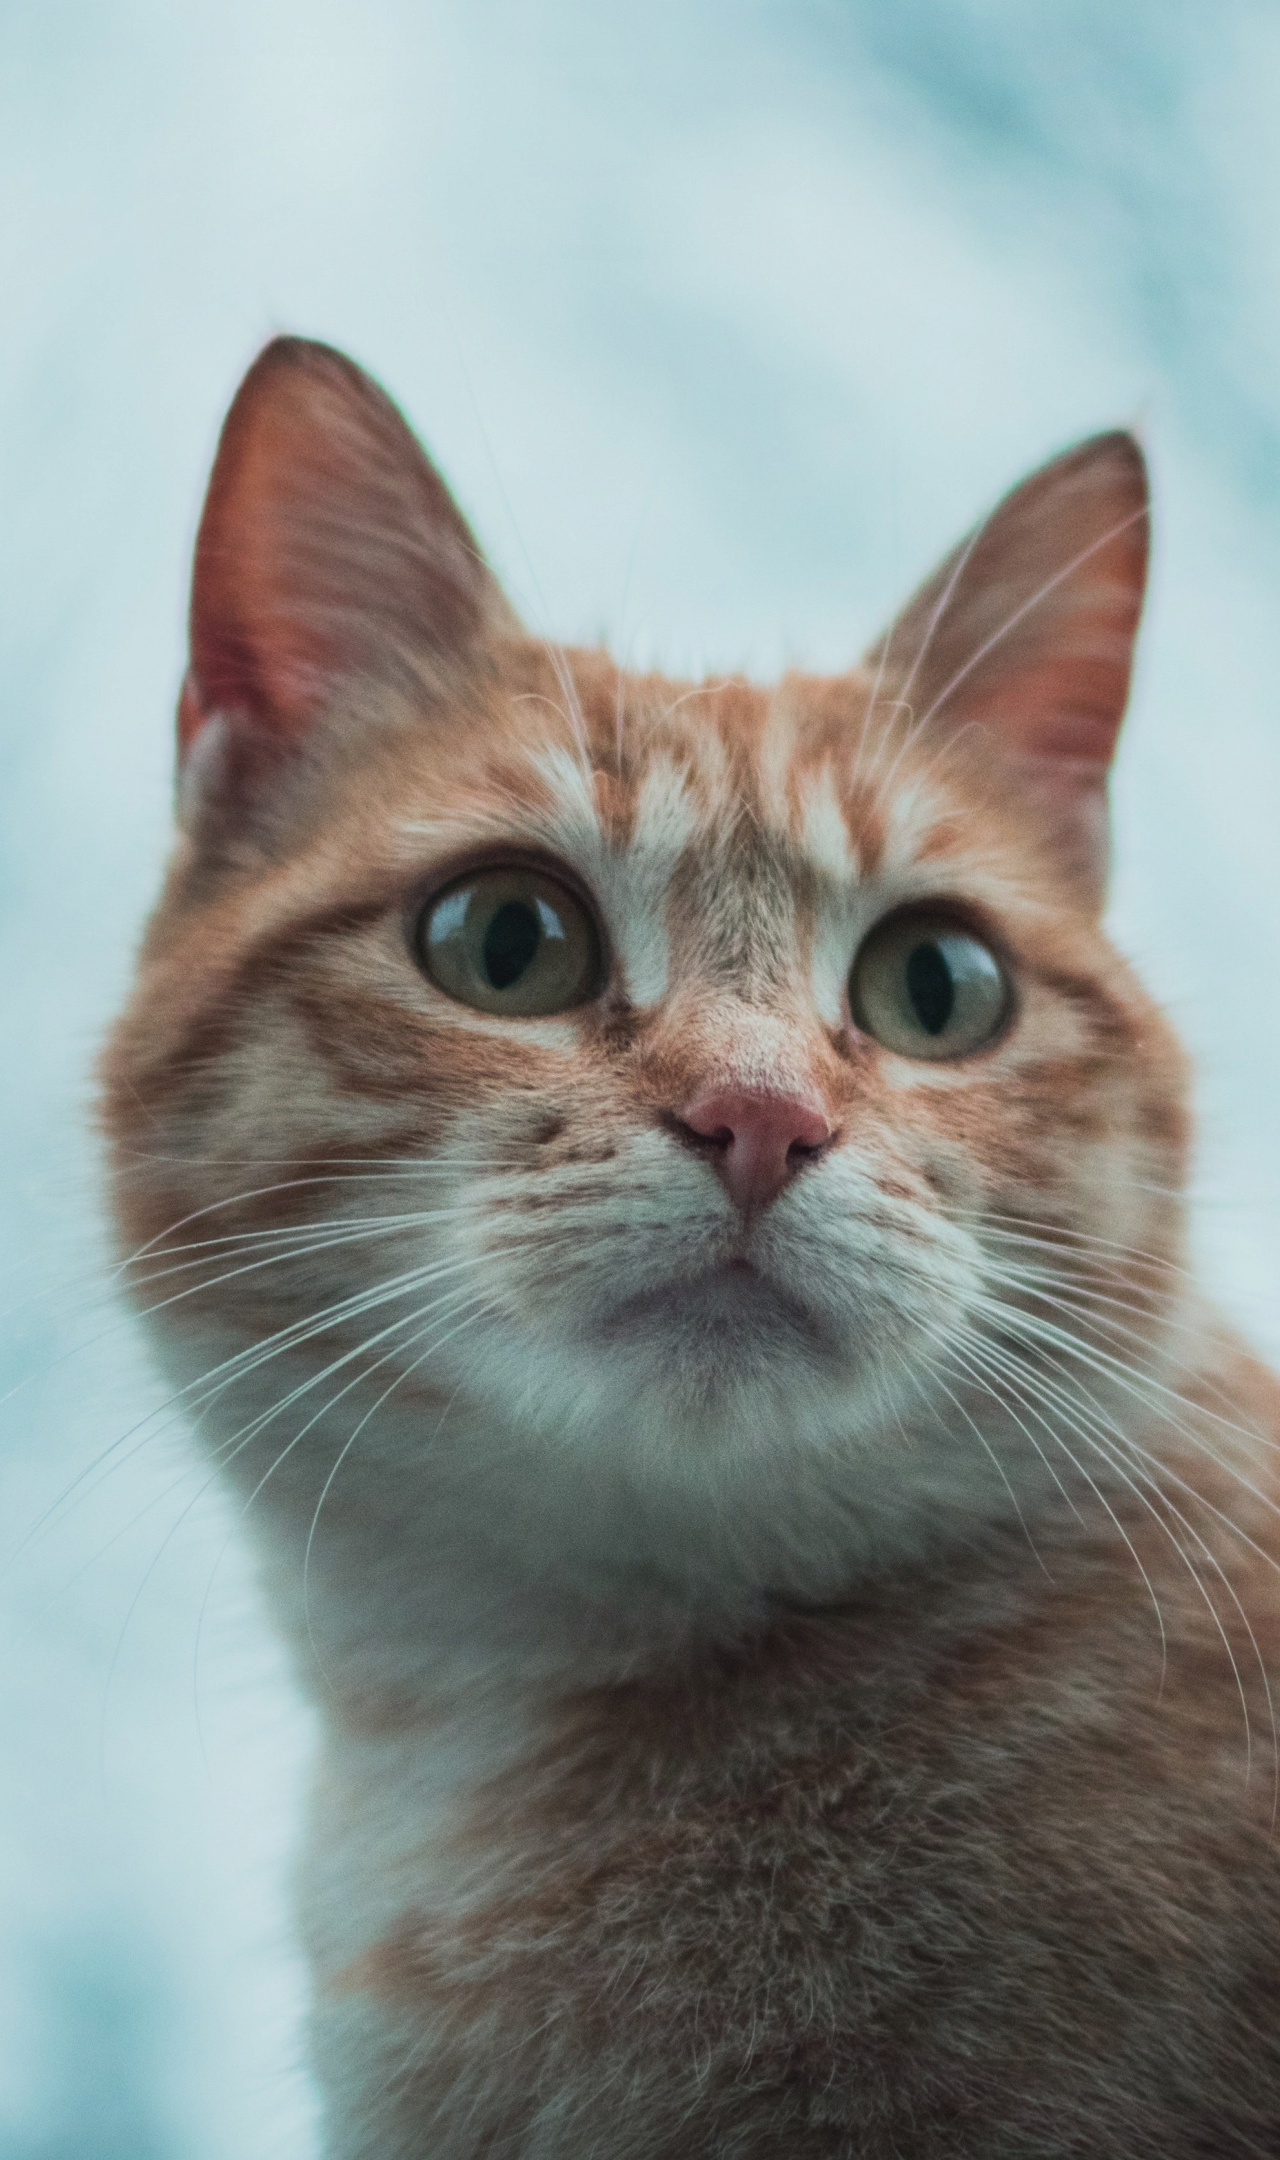

In [4]:
gatito

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [5]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [91]:
secret_list =list() #Se declara la lista vacia

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar. 
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`. 
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [92]:
for channel in  range(0,gatito_np.shape[2]): #Recorremos la fotografia 
    secret_aux = np.zeros([gatito_np.shape[0],gatito_np.shape[1]]) #Creamos el arreglo on las dimenciones de la fotografia solo con ceros.
    secret_aux = gatito_np[:,:,channel]%2*255 #Aplicamos modulo 2 y multiplicamos por el escalar indicado.
    secret_aux = secret_aux.astype(np.uint8) #modificamos su formato como se indica en las instrucciones
    secret_list.append(secret_aux) #Agregamos este elemento a nuestra lista secreta

In [93]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [82]:
secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]),axis=1) #Concatenamos
secret_np.shape

(2160, 3840)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [12]:
secret_np.dtype #Vemos que el formato sea el correcto.

dtype('uint8')

In [107]:
print('(',np.amin(secret_np),',',np.amax(secret_np),')') #vemos que los valores sean correctos

( 0 , 255 )


In [95]:
secret_img = Image.fromarray(secret_np,mode='L') #Interpretamos la imagen desde el array que lo representa.

Ahora puedes ver el resultado!

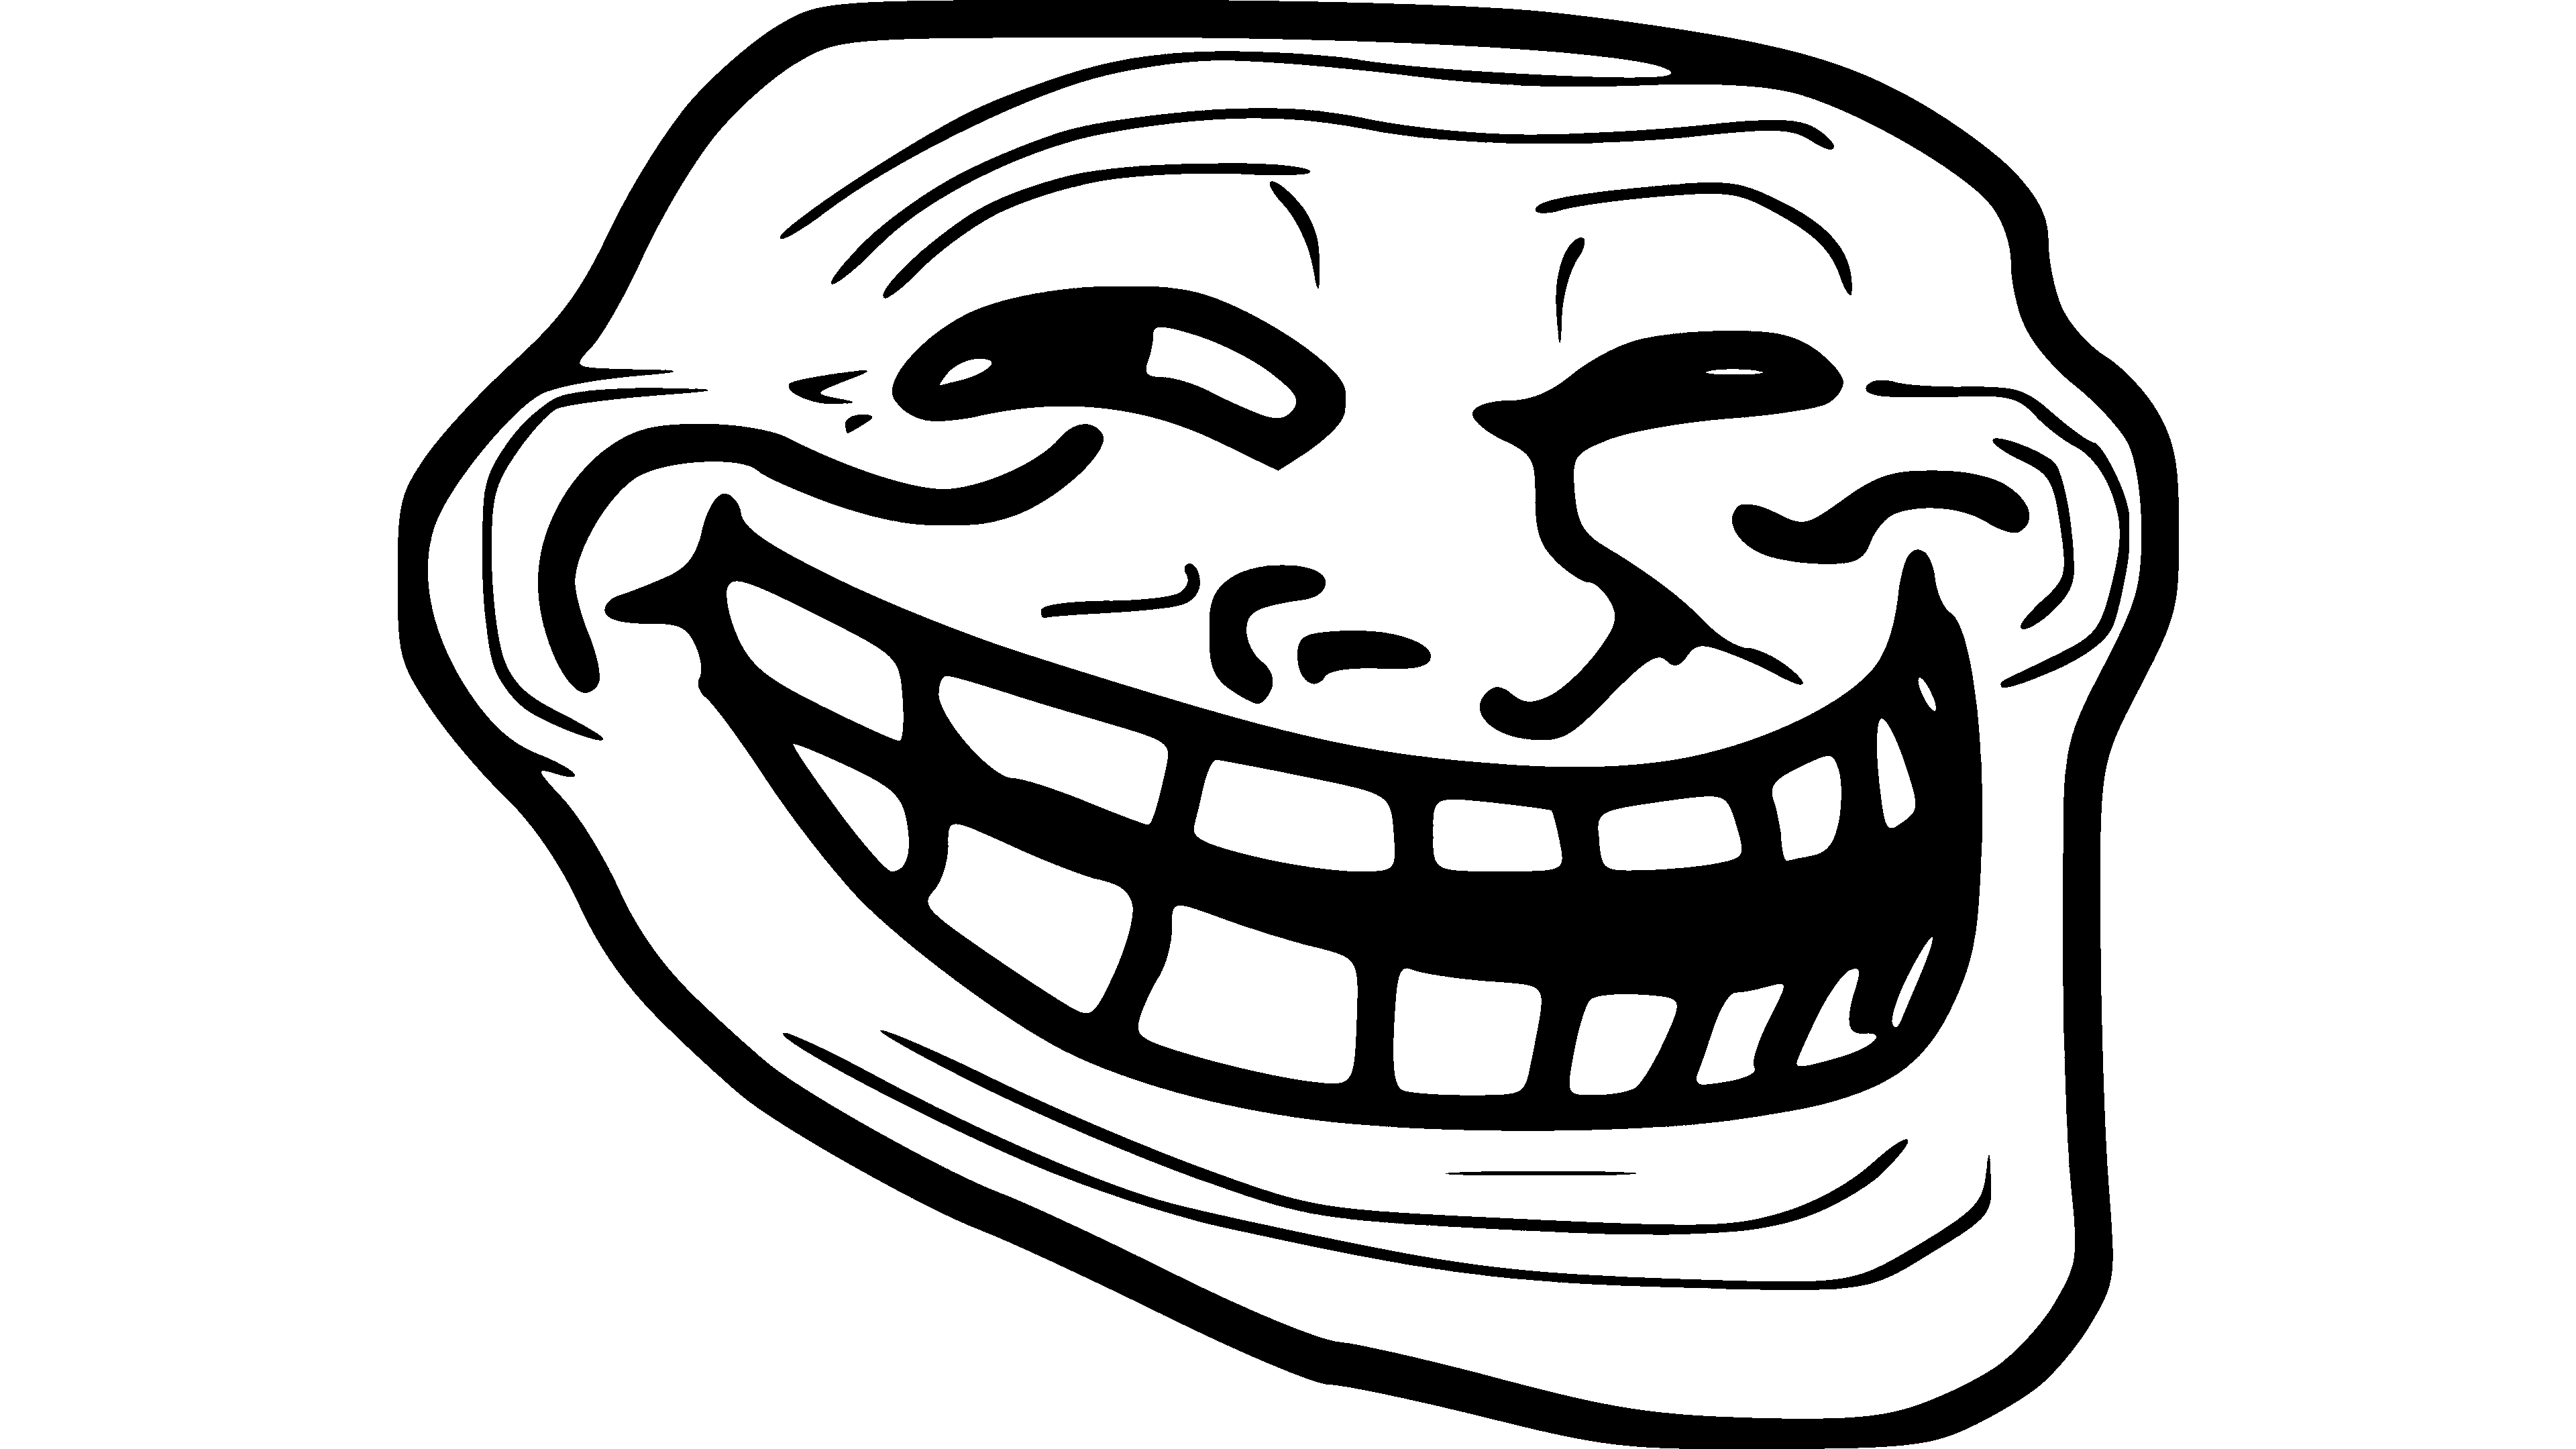

In [96]:
secret_img #Printeamos

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [109]:
my_img = Image.open(os.path.join("images", "black_and_white_example.jpg"))

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [110]:
my_img_np = np.array(my_img)
print(my_img_np.shape)#Chekeamos que la imagen sea de la dimension apropiada

(2160, 3840)


2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [113]:
umbral = 30 #Establecemos el umbral
j=0 #Contador a usar en el for
my_img_np_aux=np.zeros([my_img_np.shape[0],my_img_np.shape[1]]) #Arreglo de la misma dimension que nuestra iagen solo con ceros.
for i in my_img_np: #Recorremos nuestra imagen por columnas
    np.place(i, i<=umbral, 0) #Reemplazamos aquellos valores que esten por debajo de nuestro umbral
    np.place(i, i>umbral, 1) #Reemplazamos aquellos valores que esten por sobre de nuestro umbral
    my_img_np_aux[j]=i #Guardamos el valor reemplazado en nuestro arreglo auxiliar en la columna correspondiente.
    j+=1 #Pasamos a la siguiente columna de nuestro arreglo auxiliar
my_img_np_aux.astype(np.uint8) #Adaptamos el formato.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

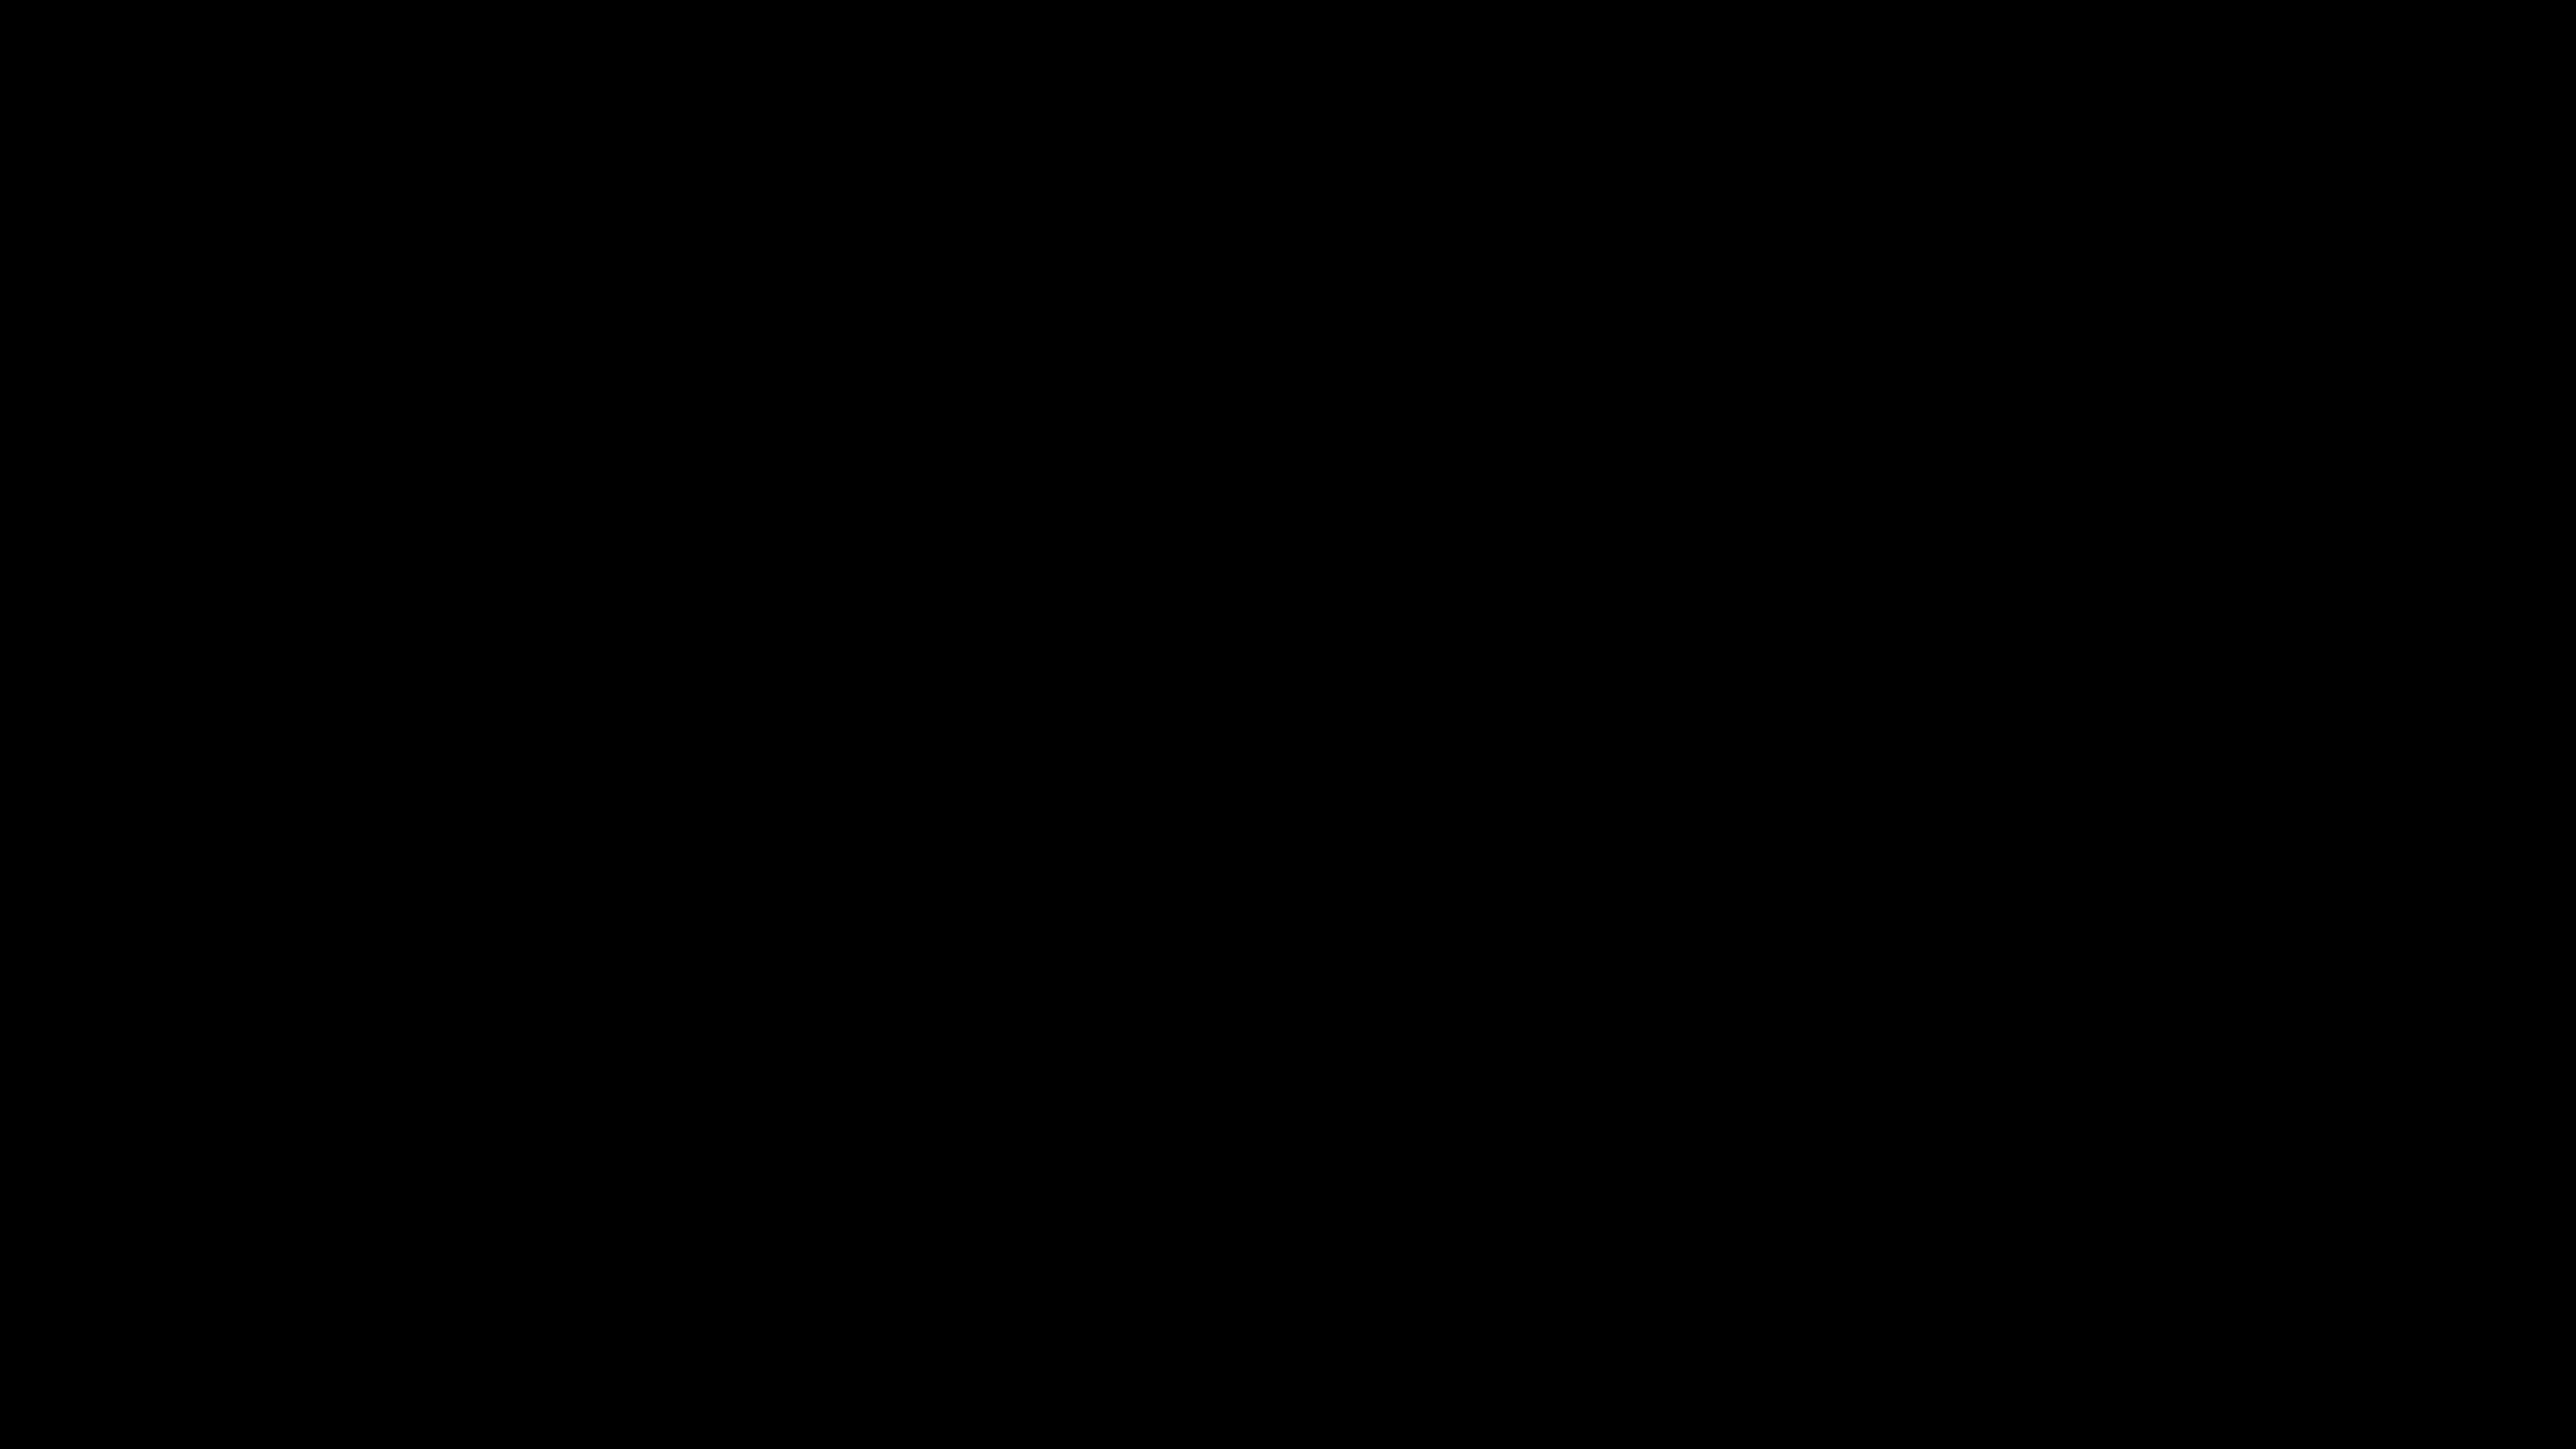

In [114]:
Image.fromarray(my_img_np_aux * 255, mode='1')

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [19]:
a, b, c = np.hsplit(my_img_np_aux, 3) #Dividimos la imagen
my_img_split = [a,b,c]

Revisa utilizando la siguiente iteración.

In [20]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [115]:
cat =Image.open(os.path.join("images", "gatito_original.png"))
cat_np =np.array(cat)
print(cat_np.shape)

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [116]:
cat_np=cat_np%2+cat_np  #sumamos el modulo 2 de la matriz cat_np , de esta manera se cumple lo pedido.

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [23]:
i=0
for channel in range(0,cat_np.shape[2]): #Iteramos sobre los canales RGB
    cat_np[:,:,channel] =cat_np[:,:,channel]+ my_img_split[i] #Sumamos los valorese 
    i+=1

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [24]:
cat_secret_im = Image.fromarray(cat_np) #Creamos nuestra imagen secreta
cat_secret_im.save(r'C:\Users\Hugo\mat281_portfolio\Tareas\tarea_01\images\my_secret.png') #La guardamos    


2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte. 

In [25]:
def imagenception(filepath): #Esta funcion basicamente repide el proseso de desifrado de imagen oculta utilizado para la trollface.
    secret_list =list()
    foto = Image.open(os.path.join(filepath))
    foto_np=np.array(foto)                  
    for channel in  range(0,foto_np.shape[2]):
        secret_aux = np.zeros([foto_np.shape[0],foto_np.shape[1]])
        secret_aux = foto_np[:,:,channel]%2*255
        secret_aux = secret_aux.astype(np.uint8)
        secret_list.append(secret_aux)
    secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]),axis=1)   
    secret_img = Image.fromarray(secret_np,mode='L')
    return secret_img

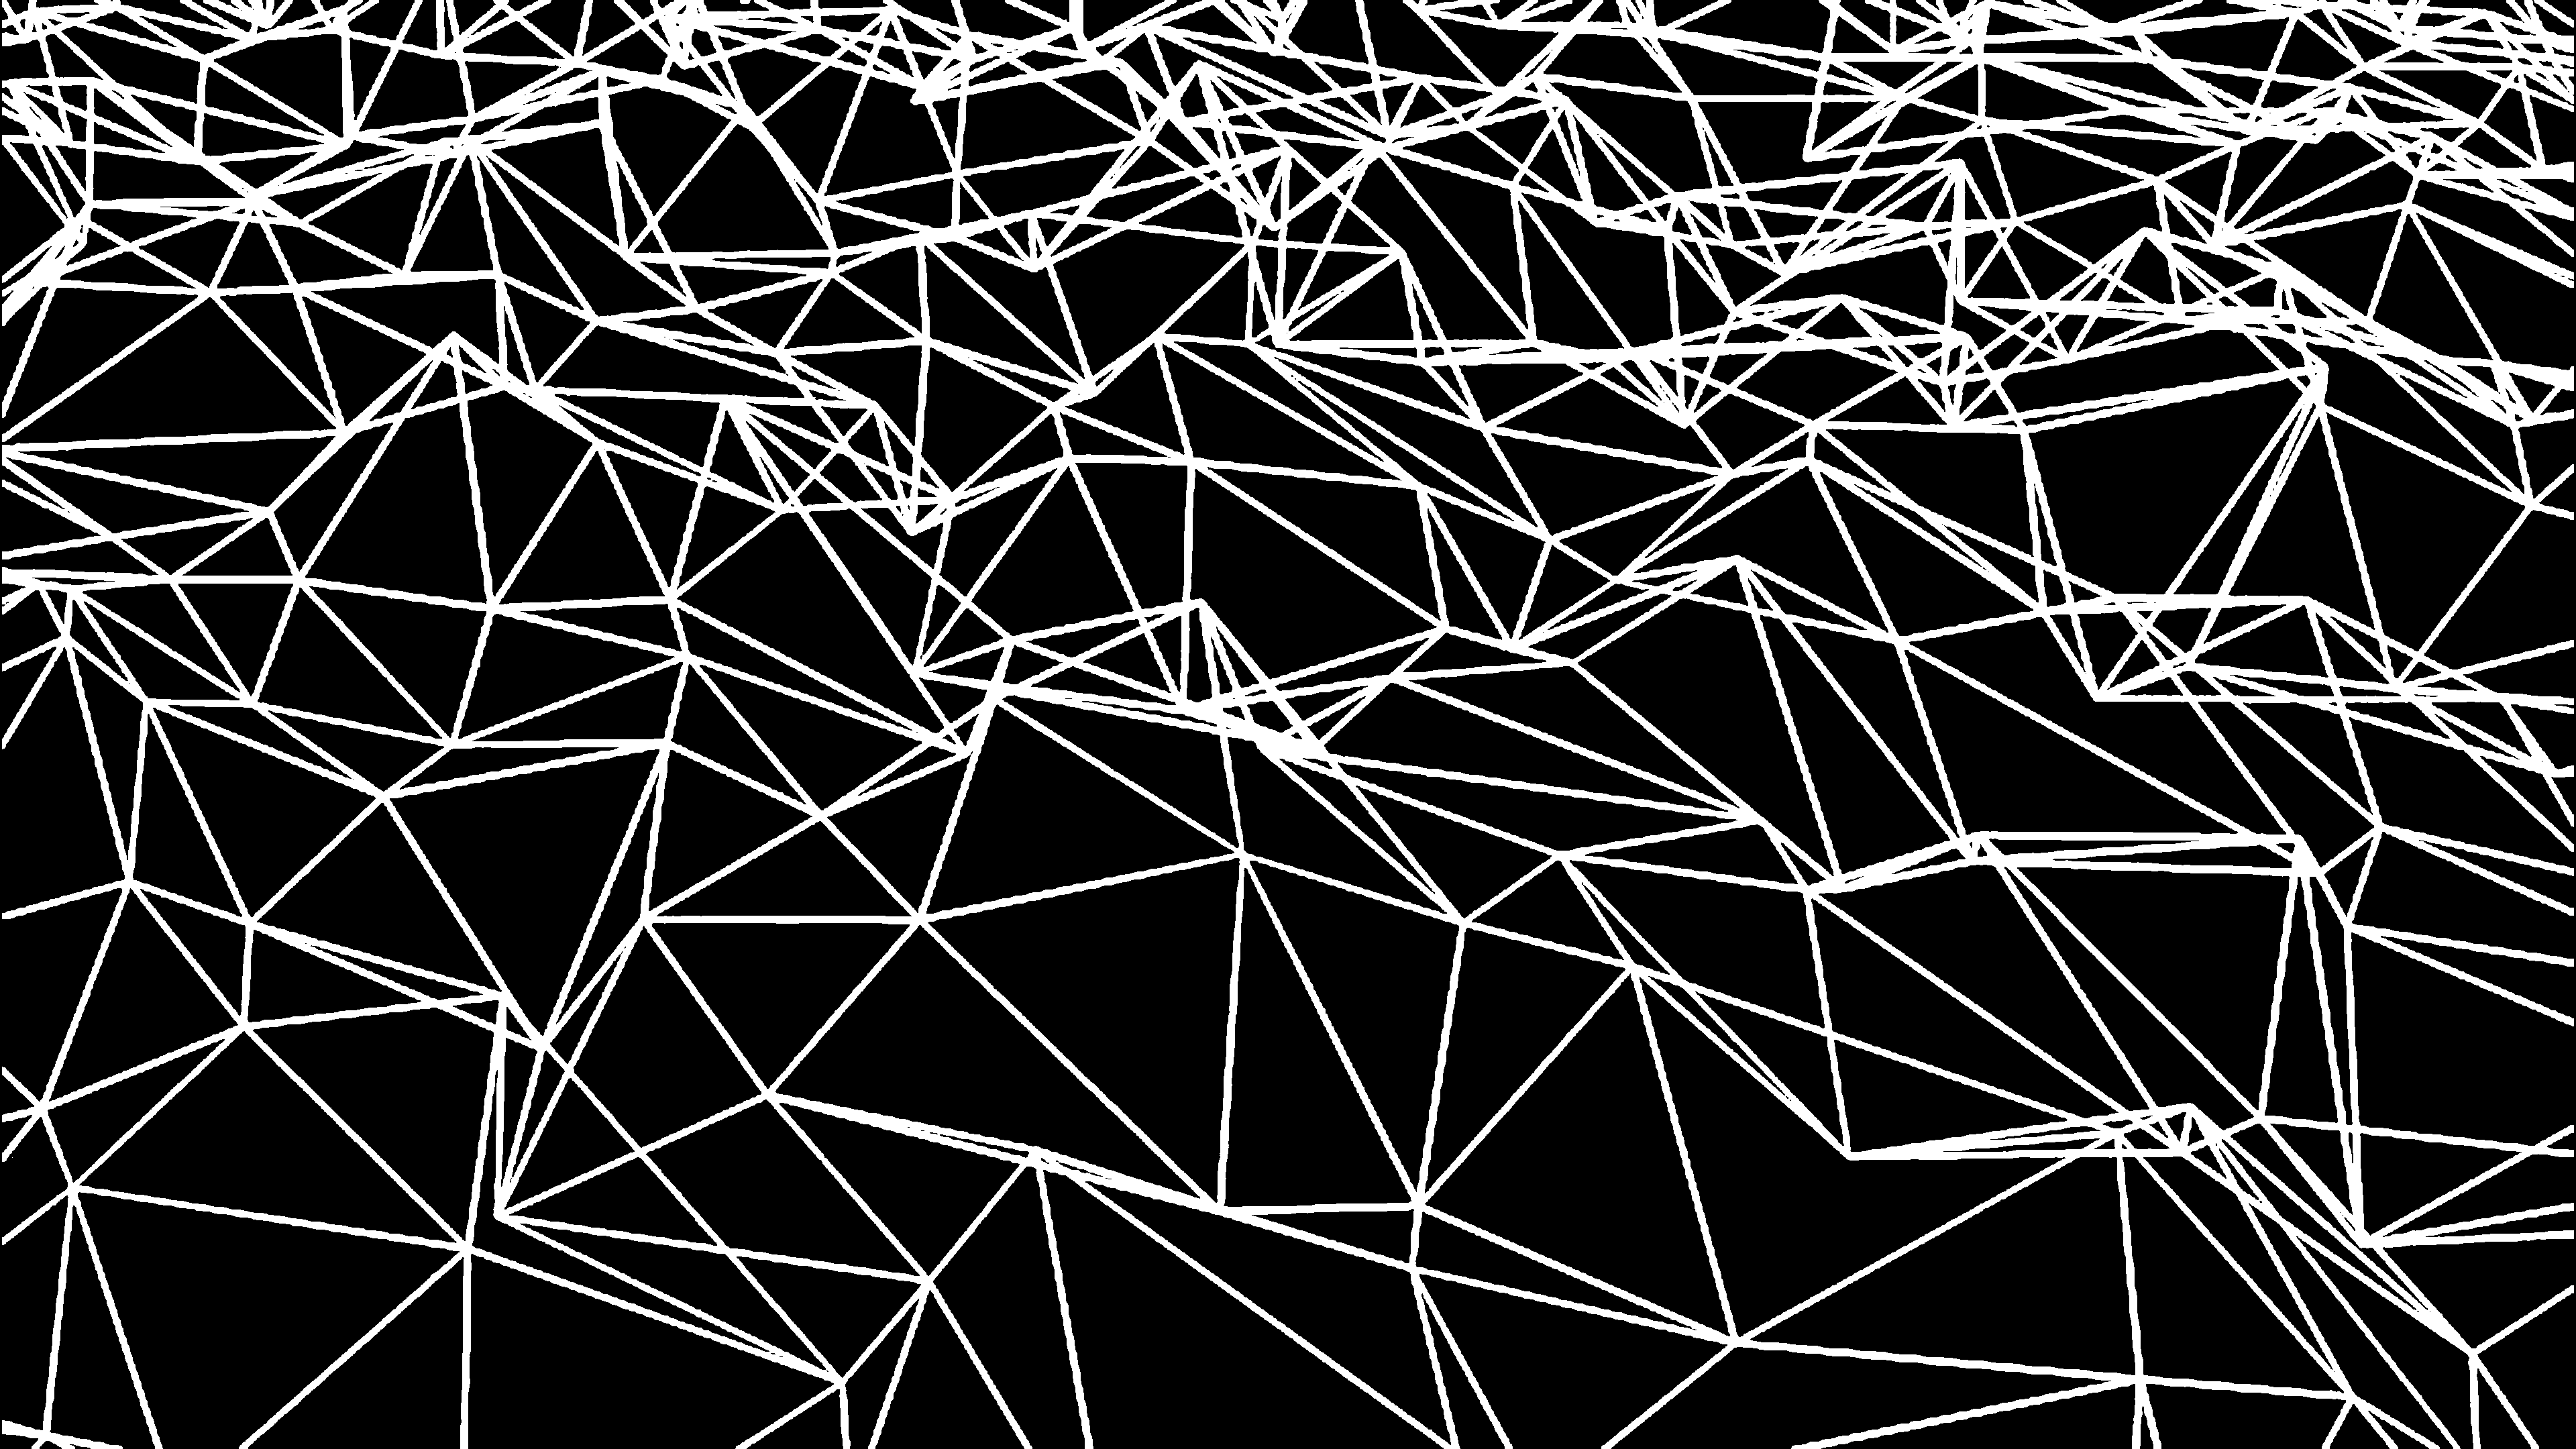

In [26]:
my_secret_img = imagenception(os.path.join("images", "my_secret.png"))
my_secret_img #Printeamos

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [27]:
# libraries
import os
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [28]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(os.path.join("data", "world-happiness", f"{year}.csv"))
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

In [29]:
df_dict[2015]

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [30]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() 
print(intersection_columns)

['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__  En pocas palabras estamos recorriendo todos los data frame de cada año , tomamos los nombres de sus columnas y no quedamos con aquellas que tienen en comun y finalmente se pide que nos quedemos con un formato lista de esto ultimo.

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
    - Nota que en la documentación de `pd.concat` puedes entregar como argumento directamente un diccionario.
    - No ordenes los _axis_ (ver documentación).
    - Los nombres de los _levels_ para los multi-index resultante deben ser `["Year", "drop_me"]`.
* Aplica el método `drop_level` con tal de eliminar el nivel del multi-index llamado `drop_me`.
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [31]:
happiness = pd.concat(df_dict,sort=False)
happiness

Country          Region  Happiness Rank  \
2015 0                 Switzerland  Western Europe               1   
     1                     Iceland  Western Europe               2   
     2                     Denmark  Western Europe               3   
     3                      Norway  Western Europe               4   
     4                      Canada   North America               5   
...                            ...             ...             ...   
2017 150                    Rwanda             NaN             151   
     151                     Syria             NaN             152   
     152                  Tanzania             NaN             153   
     153                   Burundi             NaN             154   
     154  Central African Republic             NaN             155   

          Happiness Score  Standard Error  Economy (GDP per Capita)    Family  \
2015 0              7.587         0.03411                  1.396510  1.349510   
     1              7.561         0.04884                  1.302320  1.402230   
     2              7.527         0.03328                  1.325480  1.360580   
     3              7.522         0.03880                  1.459000  1.330950   
     4              7.427         0.03553                  1.326290  1.322610   
...                   ...             ...                       ...       ...   
2017 150            3.471             NaN                  0.368746  0.945707   
     151            3.462             NaN                  0.777153  0.396103   
     152            3.349             NaN                  0.511136  1.041990   
     153            2.905             NaN                  0.091623  0.629794   
     154            2.693             NaN                  0.000000  0.000000   

          Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
2015 0                    0.941430  0.665570                       0.419780   
     1                    0.947840  0.628770                       0.141450   
     2                    0.874640  0.649380                       0.483570   
     3                    0.885210  0.669730                       0.365030   
     4                    0.905630  0.632970                       0.329570   
...                            ...       ...                            ...   
2017 150                  0.326425  0.581844                       0.455220   
     151                  0.500533  0.081539                       0.151347   
     152                  0.364509  0.390018                       0.066035   
     153                  0.151611  0.059901                       0.084148   
     154                  0.018773  0.270842                       0.056565   

          Generosity  Dystopia Residual  Lower Confidence Interval  \
2015 0      0.296780           2.517380                        NaN   
     1      0.436300           2.702010                        NaN   
     2      0.341390           2.492040                        NaN   
     3      0.346990           2.465310                        NaN   
     4      0.458110           2.451760                        NaN   
...              ...                ...                        ...   
2017 150    0.252756           0.540061                        NaN   
     151    0.493664           1.061574                        NaN   
     152    0.354256           0.621130                        NaN   
     153    0.204435           1.683024                        NaN   
     154    0.280876           2.066005                        NaN   

          Upper Confidence Interval  Whisker high  Whisker low  
2015 0                          NaN           NaN          NaN  
     1                          NaN           NaN          NaN  
     2                          NaN           NaN          NaN  
     3                          NaN           NaN          NaN  
     4                          NaN           NaN          NaN  
...                             .

In [32]:
happiness=happiness.loc[:,intersection_columns].rename(columns=lambda x: x.lower().replace(" ", "_")) #Nos quedamos con las columans que los data frame tenian en comun y hacemos los cambios de caracteres que se piden.
happiness

country  dystopia_residual  \
2015 0                 Switzerland           2.517380   
     1                     Iceland           2.702010   
     2                     Denmark           2.492040   
     3                      Norway           2.465310   
     4                      Canada           2.451760   
...                            ...                ...   
2017 150                    Rwanda           0.540061   
     151                     Syria           1.061574   
     152                  Tanzania           0.621130   
     153                   Burundi           1.683024   
     154  Central African Republic           2.066005   

          economy_(gdp_per_capita)    family   freedom  generosity  \
2015 0                    1.396510  1.349510  0.665570    0.296780   
     1                    1.302320  1.402230  0.628770    0.436300   
     2                    1.325480  1.360580  0.649380    0.341390   
     3                    1.459000  1.330950  0.669730    0.346990   
     4                    1.326290  1.322610  0.632970    0.458110   
...                            ...       ...       ...         ...   
2017 150                  0.368746  0.945707  0.581844    0.252756   
     151                  0.777153  0.396103  0.081539    0.493664   
     152                  0.511136  1.041990  0.390018    0.354256   
     153                  0.091623  0.629794  0.059901    0.204435   
     154                  0.000000  0.000000  0.270842    0.280876   

          happiness_rank  happiness_score  health_(life_expectancy)  \
2015 0                 1            7.587                  0.941430   
     1                 2            7.561                  0.947840   
     2                 3            7.527                  0.874640   
     3                 4            7.522                  0.885210   
     4                 5            7.427                  0.905630   
...                  ...              ...                       ...   
2017 150             151            3.471                  0.326425   
     151             152            3.462                  0.500533   
     152             153            3.349                  0.364509   
     153             154            2.905                  0.151611   
     154             155            2.693                  0.018773   

          trust_(government_corruption)  
2015 0                         0.419780  
     1                         0.141450  
     2                         0.483570  
     3                         0.365030  
     4                         0.329570  
...                                 ...  
2017 150                       0.455220  
     151                       0.151347  
     152                       0.066035  
     153                       0.084148  
     154                       0.056565  

[470 rows x 10 columns]

### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [33]:
happiness.describe(include="all").fillna("").T

count unique     top freq      mean       std  \
country                         470    166  Poland    3                       
dystopia_residual               470                       2.09272  0.565772   
economy_(gdp_per_capita)        470                       0.92783  0.415584   
family                          470                      0.990347  0.318707   
freedom                         470                      0.402828  0.150356   
generosity                      470                      0.242241  0.131543   
happiness_rank                  470                       78.8298   45.2814   
happiness_score                 470                       5.37073     1.137   
health_(life_expectancy)        470                      0.579968  0.240161   
trust_(government_corruption)   470                       0.13479  0.111313   

                                   min        25%        50%       75%  \
country                                                                  
dystopia_residual              0.32858    1.73798    2.09464   2.45557   
economy_(gdp_per_capita)             0   0.605292   0.995439   1.25244   
family                               0      0.793    1.02567   1.22875   
freedom                              0   0.297615   0.418347   0.51685   
generosity                           0   0.152831    0.22314  0.315824   
happiness_rank                       1         40         79       118   
happiness_score                  2.693      4.509     5.2825   6.23375   
health_(life_expectancy)             0   0.402301   0.630053  0.768298   
trust_(government_corruption)        0  0.0597774  0.0995017  0.173161   

                                    max  
country                                  
dystopia_residual               3.83772  
economy_(gdp_per_capita)        1.87077  
family                          1.61057  
freedom                         0.66973  
generosity                     0.838075  
happiness_rank                      158  
happiness_score                   7.587  
health_(life_expectancy)        1.02525  
trust_(government_corruption)   0.55191

¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [34]:
L=happiness.country.unique() #Generamos una lista con todos los paises presentes en nuestra data.
b=list() #Lista vacia donde añadiremos aquellos paises que cumplan con nuestra condicion
for i  in L: #Recorremos los paises 
    for j in range(2015,2018): #Por cada año preguntamos
        if i not in happiness['country'][j].unique(): #Sin no se encuentra en la lista de paises dentro de los cuales se tiene informacion para tal año
            b.append(i) #De ser asi se añade.           

In [35]:
print('Los ',len(set(b)), ' paises que no estan en alguno de los tres estudios son ',set(b)) #Printeamos la respuesta.

Los  20  paises que no estan en alguno de los tres estudios son  {'Somaliland Region', 'Mozambique', 'Puerto Rico', 'Laos', 'Belize', 'Djibouti', 'Somaliland region', 'Comoros', 'Hong Kong', 'South Sudan', 'Namibia', 'Somalia', 'Oman', 'Swaziland', 'Taiwan', 'Suriname', 'Lesotho', 'Hong Kong S.A.R., China', 'Central African Republic', 'Taiwan Province of China'}


__Respuesta:__  Los  20  paises que no estan en alguno de los tres estudios son  {'Somaliland Region', 'Mozambique', 'Puerto Rico', 'Laos', 'Belize', 'Djibouti', 'Somaliland region', 'Comoros', 'Hong Kong', 'South Sudan', 'Namibia', 'Somalia', 'Oman', 'Swaziland', 'Taiwan', 'Suriname', 'Lesotho', 'Hong Kong S.A.R., China', 'Central African Republic', 'Taiwan Province of China'}

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [36]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong", "Somaliland region":"Somalia", 
                          "Somaliland Region":"Somalia", "Taiwan Province of China": "Taiwan"} #Completamos nuestro diccionario
happiness = happiness.assign(country=lambda x: x['country'].replace(bad_country_names_dict)) #Reemplazamos las ambiguedades en los nombre.

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [37]:
L=happiness.country.unique() #Mismo proceso realizado anteriormente
b=list()
for i  in L:
    for j in range(2015,2018):
        if i not in happiness['country'][j].unique():
            b.append(i)

__Respuesta:__  < RESPONDER AQUÍ >

In [38]:
print('Los ',len(set(b)), ' paises que no estan en alguno de los tres estudios son ',set(b)) #Nueva respuesta.

Los  13  paises que no estan en alguno de los tres estudios son  {'Namibia', 'Swaziland', 'Comoros', 'Mozambique', 'Puerto Rico', 'Oman', 'Laos', 'Belize', 'Suriname', 'Lesotho', 'South Sudan', 'Central African Republic', 'Djibouti'}


Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [39]:
L=list() #Agregaremos la columna "year" de forma rustica
for i in range(0,len(happiness.country[2015])): #Recorremos sobre la cantidad de elementos en el año 2015
    L.append(2015) # Agregamos el año a la lista               
for i in range(0,len(happiness.country[2016])): #Recorremos sobre la cantidad de elementos en el año 2016
    L.append(2016) # Agregamos el año a la lista 
for i in range(0,len(happiness.country[2017])):#Recorremos sobre la cantidad de elementos en el año 2017
    L.append(2017) # Agregamos el año a la lista 
happiness['year']=L  #Creamos la nueva columna.  

In [40]:
happy=happiness.pivot_table(index='year', columns="country", values="happiness_score", fill_value='') #Pivoteamos de la manera en que se pide.
happy

country  Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
year                                                                            
2015           3.575    4.959    5.605   4.033      6.574    4.350      7.284   
2016           3.360    4.655    6.355   3.866      6.650    4.360      7.313   
2017           3.794    4.644    5.872   3.795      6.599    4.376      7.284   

country  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium Belize  \
year                                                                         
2015       7.200       5.212    5.960       4.694    5.813    6.937          
2016       7.119       5.291    6.218       4.643    5.802    6.929  5.956   
2017       7.006       5.234    6.087       4.608    5.569    6.891  5.956   

country  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  \
year                                                                        
2015     3.340   5.253    5.890                   4.949     4.332   6.983   
2016     3.484   5.196    5.822                   5.163     3.974   6.952   
2017     3.657   5.011    5.823                   5.182     3.766   6.635   

country  Bulgaria  Burkina Faso  Burundi  Cambodia  Cameroon  Canada  \
year                                                                   
2015        4.218         3.587    2.905     3.819     4.252   7.427   
2016        4.217         3.739    2.905     3.907     4.513   7.404   
2017        4.714         4.032    2.905     4.168     4.695   7.316   

country Central African Republic   Chad  Chile  China  Colombia Comoros  \
year                                                                      
2015                       3.678  3.667  6.670  5.140     6.477   3.956   
2016                              3.763  6.705  5.245     6.481   3.956   
2017                       2.693  3.936  6.652  5.273     6.357           

country  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Croatia  Cyprus  \
year                                                                          
2015                   3.989             4.517       7.226    5.759   5.689   
2016                   4.236             4.272       7.087    5.488   5.546   
2017                   4.291             4.280       7.079    5.293   5.621   

country  Czech Republic  Denmark Djibouti  Dominican Republic  Ecuador  Egypt  \
year                                                                            
2015              6.505    7.527    4.369               4.885    5.975  4.194   
2016              6.596    7.526                        5.155    5.976  4.362   
2017              6.609    7.522                        5.230    6.008  4.735   

country  El Salvador  Estonia  Ethiopia  Finland  France  Gabon  Georgia  \
year                                                                       
2015           6.130    5.429     4.512    7.406   6.575  3.896    4.297   
2016           6.068    5.517     4.508    7.413   6.478  4.121    4.252   
2017           6.003    5.611     4.460    7.469   6.442  4.465    4.286   

country  Germany  Ghana  Greece  Guatemala  Guinea  Haiti  Honduras  \
year                                                                  
2015       6.750  4.633   4.857      6.123   3.656  4.518     4.788   
2016       6.994  4.276   5.033      6.324   3.607  4.028     4.871   
2017       6.951  4.120   5.227      6.454   3.507  3.603     5.181   

country  Hong Kong  Hungary  Iceland  India  Indonesia   Iran   Iraq  Ireland  \
year                                                                            
2015         5.474    4.800    7.561  4.565      5.399  4.686  4.677    6.940   
2016         5.458    5.145    7.501  4.404      5.314  4.813  4.575    6.907   
2017         5.472    5.324    7.504  4.315      5.262  4.692  4.497    6.977   

country  Israel  Italy  Ivory Coast  Jamaica  Japan  Jordan  Kazakhstan  \
year                                                        

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  < RESPONDER AQUÍ >

En promedio, ¿Cuáles son los tres países con el mejor ranking de felicidad?

In [41]:
happiness.pivot_table(index='year', columns="country", values="happiness_rank", fill_value='').mean().sort_values()[0:3] #Pivoteamos como antes pero con respecto al ranking dde felicidad saamos promedio y ordenamos los valores y nos quedamos con los primeros 3

country
Denmark        2.000000
Switzerland    2.333333
Iceland        2.666667
dtype: float64

__Respuesta:__  < RESPONDER AQUÍ >

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad? ¿Son distintos a los con mejor ranking en promedio?

In [42]:
happiness.pivot_table(index='year', columns="country", values="happiness_score", fill_value='').mean().sort_values(ascending=False)[0:3] #Proseso analogo al anterior pero con happines score

country
Switzerland    7.530
Denmark        7.525
Iceland        7.522
dtype: float64

__Respuesta:__  < RESPONDER AQUÍ >

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [43]:
hap_mean_factors = happiness.drop(['happiness_score','happiness_rank'],axis=1).groupby(['year']).mean() #Dropeamos las columnas que no nos interesan agrupamos por año y nos quedamos con el promedio. 
hap_mean_factors

dystopia_residual  economy_(gdp_per_capita)    family   freedom  \
year                                                                    
2015           2.098977                  0.846137  0.991046  0.428615   
2016           2.325807                  0.953880  0.793621  0.370994   
2017           1.850238                  0.984718  1.188898  0.408786   

      generosity  health_(life_expectancy)  trust_(government_corruption)  
year                                                                       
2015    0.237296                  0.630259                       0.143422  
2016    0.242635                  0.557619                       0.137624  
2017    0.246883                  0.551341                       0.123120

Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [44]:
k=0 #Valor inicial con el cual comparar
for j in range(2015,2018): #Recorremos los años de hap_mean_factors
    for i in hap_mean_factors.columns: #Recorremos las columnas.
        k1=(hap_mean_factors[i]/hap_mean_factors.sum(axis=1))[j] #Hacemos una divicion para ver el nivel de importancia de cada factor
        if k1>=k:#Lo comparamos con algun factor estudiado antes.
            k=k1 #Nos quedamos con el en el caso de que sea de mayor importacia.
            a=i #y nos quedamos tambienc con el nombre de dicho factor de mas importancia
    print('En el año ',j,' el factor mas contribuyente fue ', a , ' Con un porsentaje de importancia de ', k*100)  #Printeamos el resultado por año  
        
    
    
    
    

En el año  2015  el factor mas contribuyente fue  dystopia_residual  Con un porsentaje de importancia de  39.04527097329634
En el año  2016  el factor mas contribuyente fue  dystopia_residual  Con un porsentaje de importancia de  43.21310325737652
En el año  2017  el factor mas contribuyente fue  dystopia_residual  Con un porsentaje de importancia de  43.21310325737652


__Resuesta:__
* 2015:  En el año  2015  el factor mas contribuyente fue  dystopia_residual  Con un porsentaje de importancia de  39.04527097329634
* 2016:  En el año  2016  el factor mas contribuyente fue  dystopia_residual  Con un porsentaje de importancia de  43.21310325737652
* 2017:  En el año  2017  el factor mas contribuyente fue  dystopia_residual  Con un porsentaje de importancia de  43.21310325737652

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [45]:
suicide = pd.read_csv(os.path.join("data", "suicide_rates.csv"))
suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [46]:
suicide.describe(include="all").fillna("").T

count unique                top   freq         mean  \
country             27820    101            Austria    382                
year                27820                                       2001.26   
sex                 27820      2             female  13910                
age                 27820      6          75+ years   4642                
suicides_no         27820                                       242.574   
population          27820                                   1.84479e+06   
suicides/100k pop   27820                                       12.8161   
country-year        27820   2321   South Africa1998     12                
HDI for year         8364                                      0.776601   
 gdp_for_year ($)   27820   2321  2,130,491,320,659     12                
gdp_per_capita ($)  27820                                       16866.5   
generation          27820      6       Generation X   6408                

                            std    min      25%     50%          75%  \
country                                                                
year                    8.46906   1985     1995    2002         2008   
sex                                                                    
age                                                                    
suicides_no             902.048      0        3      25          131   
population          3.91178e+06    278  97498.5  430150  1.48614e+06   
suicides/100k pop       18.9615      0     0.92    5.99        16.62   
country-year                                                           
HDI for year          0.0933667  0.483    0.713   0.779        0.855   
 gdp_for_year ($)                                                      
gdp_per_capita ($)      18887.6    251     3447    9372        24874   
generation                                                             

                            max  
country                          
year                       2016  
sex                              
age                              
suicides_no               22338  
population          4.38052e+07  
suicides/100k pop        224.97  
country-year                     
HDI for year              0.944  
 gdp_for_year ($)                
gdp_per_capita ($)       126352  
generation

Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [47]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(['country','year']) #Agrupamos con respecto al pais y el año
    .agg(
        'sum'#Sumamos cada uno de los criterios presentes en cada pais en cada año
    )
    .reset_index()
    .assign(
        suicides_ratio_100k= lambda x: x['suicides_no']/x['population'],#Describimos las nuevas columnas 
        suicides_rank= lambda x: x['suicides_ratio_100k'].rank(ascending=False)
    )
)

suicides_agg


country  year  suicides_no  population  suicides/100k pop  \
0        Albania  1987           73     2709600              31.85   
1        Albania  1988           63     2764300              32.46   
2        Albania  1989           68     2803100              33.40   
3        Albania  1992           47     2822500              18.00   
4        Albania  1993           73     2807300              32.56   
...          ...   ...          ...         ...                ...   
2316  Uzbekistan  2010         1464    25651783              63.23   
2317  Uzbekistan  2011         1640    25978049              67.14   
2318  Uzbekistan  2012         1835    26381830              77.53   
2319  Uzbekistan  2013         1950    26838924              78.86   
2320  Uzbekistan  2014         2095    27313507              85.12   

      HDI for year  gdp_per_capita ($)  suicides_ratio_100k  suicides_rank  
0            0.000                9552             0.000027         1999.0  
1            0.000                9228             0.000023         2052.0  
2            0.000                9996             0.000024         2038.0  
3            0.000                3012             0.000017         2131.0  
4            0.000                5244             0.000026         2010.0  
...            ...                 ...                  ...            ...  
2316         7.860               18396             0.000057         1653.0  
2317         7.932               21204             0.000063         1592.0  
2318         8.016               23568             0.000070         1516.0  
2319         8.064               25800             0.000073         1477.0  
2320         8.100               27708             0.000077         1418.0  

[2321 rows x 9 columns]

Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [48]:
hap_sui = happiness.merge(suicides_agg, on=['year','country'])
hap_sui.head()

country  dystopia_residual  economy_(gdp_per_capita)   family  freedom  \
0  Switzerland            2.51738                   1.39651  1.34951  0.66557   
1      Iceland            2.70201                   1.30232  1.40223  0.62877   
2      Denmark            2.49204                   1.32548  1.36058  0.64938   
3       Norway            2.46531                   1.45900  1.33095  0.66973   
4      Finland            2.61955                   1.29025  1.31826  0.64169   

   generosity  happiness_rank  happiness_score  health_(life_expectancy)  \
0     0.29678               1            7.587                   0.94143   
1     0.43630               2            7.561                   0.94784   
2     0.34139               3            7.527                   0.87464   
3     0.34699               4            7.522                   0.88521   
4     0.23351               6            7.406                   0.88911   

   trust_(government_corruption)  year  suicides_no  population  \
0                        0.41978  2015         1073     7892502   
1                        0.14145  2015           40      308554   
2                        0.48357  2015          564     5383060   
3                        0.36503  2015          590     4882909   
4                        0.41372  2015          731     5181797   

   suicides/100k pop  HDI for year  gdp_per_capita ($)  suicides_ratio_100k  \
0             164.66           0.0             1032816             0.000136   
1             140.65           0.0              658908             0.000130   
2             121.42           0.0              671664             0.000105   
3             136.43           0.0              950244             0.000121   
4             161.19           0.0              538344             0.000141   

   suicides_rank  
0          793.0  
1          868.0  
2         1124.0  
3          967.0  
4          739.0

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [49]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr() #Calculamos la correlacion lineal entre los factores de interez

happiness_rank  suicides_rank
happiness_rank        1.000000       0.113848
suicides_rank         0.113848       1.000000

__Respuesta:__  Claramente no hay correlacion del tipo lineal entre estas variables.

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [50]:
for i in range(2015,2018): #Hacemos lo mismo que antes pero por año
    print('La correlacion obtenida para el año ',i, ' es ', hap_sui[hap_sui['year']==i].loc[:, ["happiness_rank", "suicides_rank"]].corr())

La correlacion obtenida para el año  2015  es                  happiness_rank  suicides_rank
happiness_rank        1.000000       0.122542
suicides_rank         0.122542       1.000000
La correlacion obtenida para el año  2016  es                  happiness_rank  suicides_rank
happiness_rank        1.000000       0.137999
suicides_rank         0.137999       1.000000
La correlacion obtenida para el año  2017  es                  happiness_rank  suicides_rank
happiness_rank             NaN            NaN
suicides_rank              NaN            NaN


__Respuesta:__  Vemos que no hay informacion para el año 2017 y que tampoco existe evidencia de una correlacion de tipo lineal entre dichas variables en los años observados.

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [51]:
hap_sui.loc[:, ["happiness_score", "suicides_ratio_100k"]].corr() #Hacemos lo mismo que antes pero cambiando las variables de interes

happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.021455
suicides_ratio_100k         0.021455             1.000000

In [52]:
for i in range(2015,2018): #Ahora por años
    print('La correlacion obtenida para el año ',i, ' es ', hap_sui[hap_sui['year']==i].loc[:, ["happiness_score", "suicides_ratio_100k"]].corr())

La correlacion obtenida para el año  2015  es                       happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.035262
suicides_ratio_100k         0.035262             1.000000
La correlacion obtenida para el año  2016  es                       happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.025924
suicides_ratio_100k         0.025924             1.000000
La correlacion obtenida para el año  2017  es                       happiness_score  suicides_ratio_100k
happiness_score                  NaN                  NaN
suicides_ratio_100k              NaN                  NaN


Vemos que al igual que antes no existen evidencias de una correlacion lineal entre las variables de estudio en ninguna de los dos casos.

### III.- Índices de Costos de Vida

<img src="https://i.pinimg.com/originals/e7/dd/38/e7dd3861c4d30a2826515a8861300db7.png" width="480" height="360" align="center"/>

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [54]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index  
0                         69.79  
1                        130.21  
2                          9.73  
3                        133.91  
4                        132.41

### Ejercicio 3.1 

Explique lo que se hizo en la celda anterior detalladamente.
Creamos una lista que nos permita recorrer por los años de los que tenemos informacion del estudio leemos la informacion desde una direccion web en donde deben estar contenidos los datos para cada año de interes descrito en la lista inicial , luego transformamos a minusculas y reemplazamo los espacios por "_" en los nombres de las columnas finalmente como aparentemente la data esta ordenada como unranking tomamos el indice original y le sumamos 1 para que tenga mas sentido como un rankingque parte desde el primero (1°) y nos quedamos con el año y el ranking como indices.

### Ejercicio 3.2 

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

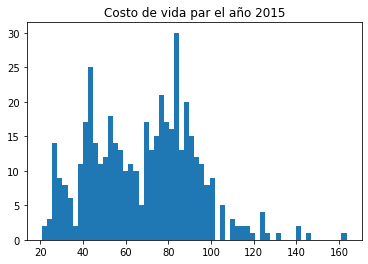

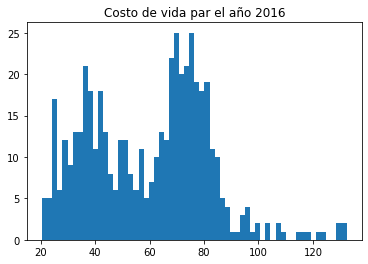

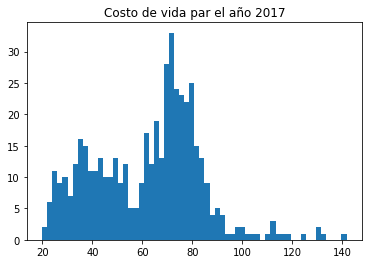

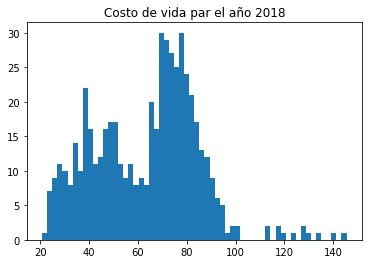

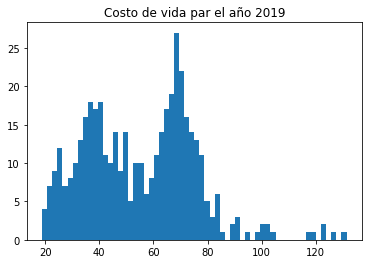

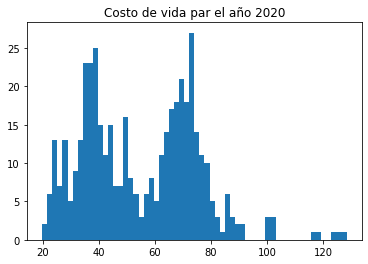

<Figure size 432x288 with 0 Axes>

In [56]:
for i in range(0,6):  #Recorremos por los años de estudio
    lf1=life_cost[life_cost.year==(2015+i)].cost_of_living_index #Tomamos el costo de vida del año correspondiente
    j=2015+i
    plt.title("Costo de vida par el año "+str(2015+i) ) #Ploteamos.
    plt.hist(lf1, bins = 60)
    plt.show()
    plt.clf()
    

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 3.3 

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [57]:
rol_seed = 201610531  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values
my_cities

array(['Fort Lauderdale, FL, United States', 'Belo Horizonte, Brazil',
       'Innsbruck, Austria', 'Riyadh, Saudi Arabia', 'Victoria, Canada',
       'Cali, Colombia', 'Vilnius, Lithuania',
       'Colorado Springs, CO, United States',
       'Raleigh, NC, United States', 'Quebec City, Canada'], dtype=object)

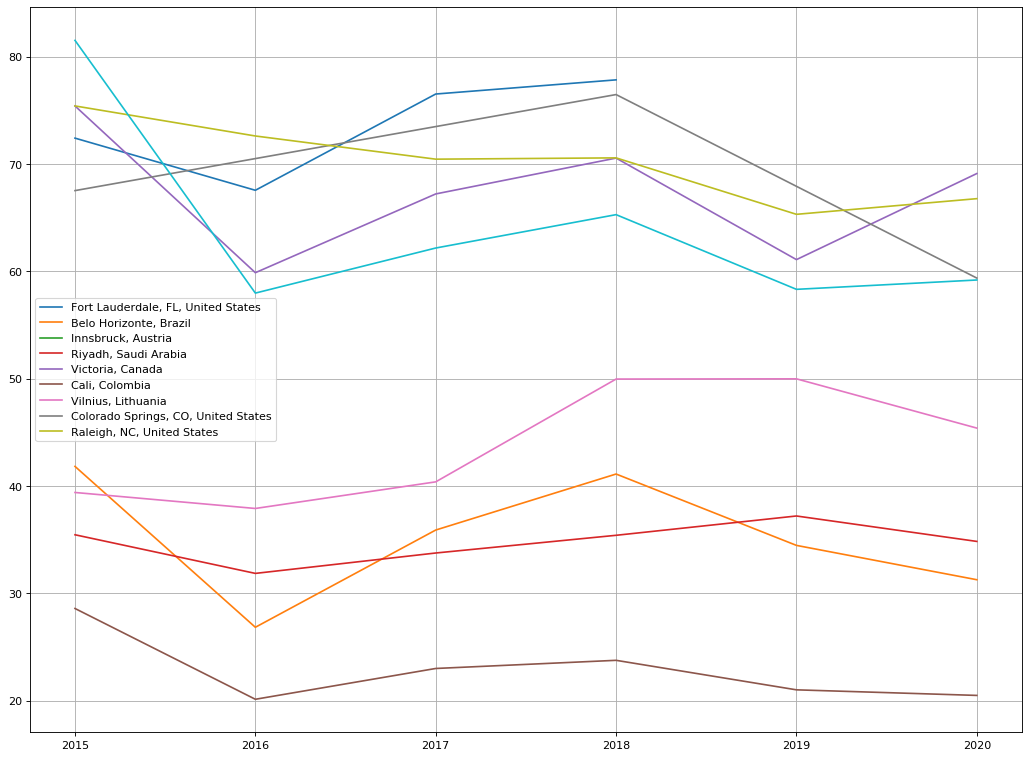

In [58]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80)
j='#'#El rol de este string es netamnte poder aplicar un .loc mas adelante de manera conveniente
for i in my_cities:
    j=j+'|'+i #Empezamos a conreuir un string que sera de utilidad mas adelante con los nombres de cada pais que me toco
    plt.legend(my_cities)#Tomamos como leyenda los nombres de las ciudades
    plt.grid(True)#Le ponemos grillado
    plt.plot(life_cost[life_cost.city== i].year,life_cost[life_cost.city== i].restaurant_price_index) #Plotemoas nuestra variable de interes con respecto al paso de los años

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 3.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [59]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

In [60]:
lf=life_cost.loc[life_cost['city'].str.contains(j,regex=True)].groupby(['city']).mean().loc[:,list(redable_index_names)] #Aqui es donde el string j que armamos antes nos ahorra trabajo ya que me quedo con aquellas ciudades que contengas alguno de los nombres que me tocaron.
lf.columns=[ 'Costo de Vida', 'Alquiler', 'Costo de Vida + Alquiler', 'Comestibles', 'Restaurantes', 'Poder Adquisitivo Local'] #Pongo los nombres de las columnas en español y de manera mas familiar.
lf


Costo de Vida   Alquiler  \
city                                                            
Belo Horizonte, Brazil                   45.221667  12.258333   
Cali, Colombia                           31.080000   7.568333   
Colorado Springs, CO, United States      73.856667  31.843333   
Fort Lauderdale, FL, United States       80.300000  49.972500   
Innsbruck, Austria                       75.310000  29.770000   
Quebec City, Canada                      71.166667  17.991667   
Raleigh, NC, United States               73.205000  35.890000   
Riyadh, Saudi Arabia                     49.311667  15.828333   
Victoria, Canada                         73.600000  34.968333   
Vilnius, Lithuania                       49.136667  15.970000   

                                     Costo de Vida + Alquiler  Comestibles  \
city                                                                         
Belo Horizonte, Brazil                              29.343333    33.980000   
Cali, Colombia                                      19.748333    26.835000   
Colorado Springs, CO, United States                 53.540000    75.980000   
Fort Lauderdale, FL, United States                  65.632500    82.450000   
Innsbruck, Austria                                  53.530000    65.150000   
Quebec City, Canada                                 45.540000    75.041667   
Raleigh, NC, United States                          55.221667    77.318333   
Riyadh, Saudi Arabia                                33.188333    41.303333   
Victoria, Canada                                    54.976667    77.741667   
Vilnius, Lithuania                                  33.155000    38.733333   

                                     Restaurantes  Poder Adquisitivo Local  
city                                                                        
Belo Horizonte, Brazil                  35.238333                37.461667  
Cali, Colombia                          22.830000                38.945000  
Colorado Springs, CO, United States     67.796667               133.120000  
Fort Lauderdale, FL, United States      73.590000               119.822500  
Innsbruck, Austria                      73.670000                73.930000  
Quebec City, Canada                     64.085000               119.750000  
Raleigh, NC, United States              70.196667               143.950000  
Riyadh, Saudi Arabia                    34.756667               132.980000  
Victoria, Canada                        67.216667               108.893333  
Vilnius, Lithuania                      43.843333                57.261667

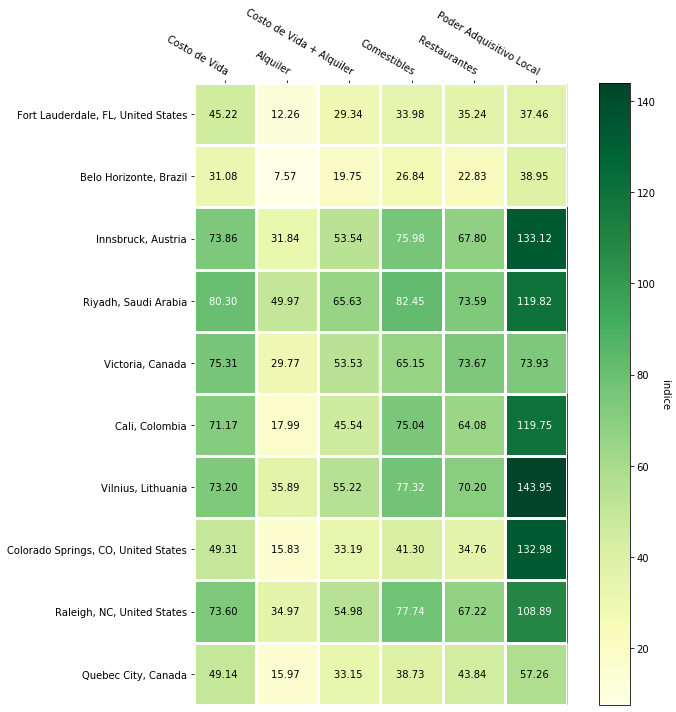

In [61]:
from mpl_heatmap import heatmap, annotate_heatmap #Reciclo un mapa de calor ocupado por usted en una de sus clases 
fig, ax = plt.subplots(figsize=(10, 10))
im, cbar = heatmap(
    lf, # valores
    my_cities, # filas
    lf.columns, # columnas
    ax=ax, # ventana
    cmap="YlGn",  # gama de colores
    cbarlabel="indice" # nombre barra de colores
)
texts = annotate_heatmap(im, valfmt="{x:.2f} ")
fig.tight_layout()
plt.show()

### Ejercicio 3.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [62]:
aux=life_cost['city'] #Genero una lista auxiliar con el nombre de las ciudades.

In [63]:
L1=list()#Lista vacia donde guardare el nombre de los paises correspondientes
for i in aux: #Recorremos las ciudades
    L=list() #Lista donde guadaremo el nombre del pais al reves
    for j in i[::-1]: #Recorremos desde atras el nombre de la ciudad
        if j!= ',': #Hasta que nos topemos con unna coma
            L.append(j) #Agregamos letra por letra
        else:# Si nos topamos con una coma nos detenemos
            break
    L1.append(''.join(L)[::-1]) #Ahora guardamos en l1 la union de todas la letras guardadas en L y la damos vuelta.
life_cost['country']=L1 #Agregamos la columans con el nombre d elos paises

In [64]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

In [65]:
j='#'#Este proceso es similar al que se hiso en la pregunta anterior y es por conveniencia.
for i in my_countries:
    j=j+'|'+i

In [66]:
life_cost

year  rank                       city  cost_of_living_index  rent_index  \
0     2015     1          Hamilton, Bermuda                163.55      120.02   
1     2015     2        Geneva, Switzerland                145.18       81.46   
2     2015     3         Caracas, Venezuela                141.41       60.46   
3     2015     4        Zurich, Switzerland                141.06       66.39   
4     2015     5             Tromso, Norway                131.45       55.80   
...    ...   ...                        ...                   ...         ...   
2842  2020   436          Karachi, Pakistan                 23.07        4.57   
2843  2020   437        Islamabad, Pakistan                 22.95        6.00   
2844  2020   438          Vijayawada, India                 22.31        5.09   
2845  2020   439       Visakhapatnam, India                 21.09        4.11   
2846  2020   440  Thiruvananthapuram, India                 19.77        4.33   

      cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                             142.28           191.71                  132.91   
1                             114.05           161.14                  141.23   
2                             101.86           155.16                  122.27   
3                             104.57           148.56                  146.90   
4                              94.48           127.72                  137.08   
...                              ...              ...                     ...   
2842                           14.22            20.03                   19.20   
2843                           14.84            22.23                   17.22   
2844                           14.07            23.04                   13.19   
2845                           12.97            21.43                   13.52   
2846                           12.38            20.31                   10.66   

      local_purchasing_power_index       country  
0                            69.79       Bermuda  
1                           130.21   Switzerland  
2                             9.73     Venezuela  
3                           133.91   Switzerland  
4                           132.41        Norway  
...                            ...           ...  
2842                         29.27      Pakistan  
2843                         30.28      Pakistan  
2844                         47.38         India  
2845                         52.04         India  
2846                         62.74         India  

[2847 rows x 10 columns]

In [67]:
life_cost2020=life_cost.loc[life_cost['year']==2020]
my_countries2020=life_cost2020.loc[life_cost['city'].str.contains(j,regex=True)] #Ocupamos aqui el string j que construimos anteriormente.

C:\Users\Hugo\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


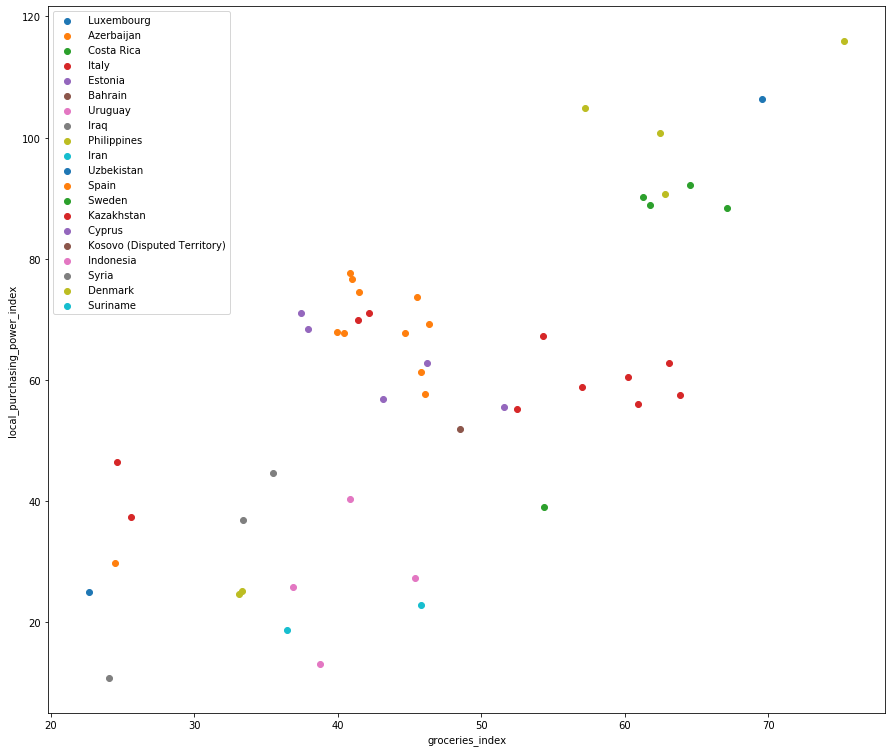

In [68]:
fig = plt.figure(figsize=(15, 13)) # ventana
for i in my_countries: #Recorremos por paises 
    plt.scatter( #Hacemos un scatter plot con las variables de interes por cada pais
        my_countries2020[my_countries2020['country']==i].groceries_index, 
        my_countries2020[my_countries2020['country']==i].local_purchasing_power_index, 
        cmap='tab20',
        alpha=1, # intensidad color
        label=i # etiquetdo fijando posicion
    )
plt.xlabel("groceries_index")
plt.ylabel("local_purchasing_power_index")
plt.legend(loc='upper left')
plt.show()    


¿Qué comentarios puedes entregar al comparar los países seleccionados?

Como comportamiento general de piede interpretar que medua que mayor es el local_purchasing_power_index mayor es el groceries_index , ademas de eso hay paises que presentan comportamients bastantes homogenios con respecto a esta comparacion como lo son españa kazakhstan y estonia.

### Ejercicio 3.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [70]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head(5)

country continent
0               Andorra        EU
1  United Arab Emirates        AS
2           Afghanistan        AS
3   Antigua and Barbuda        NA
4              Anguilla        NA

In [71]:
for i in range(0,len(life_cost.country)):
    life_cost['country'][i]=life_cost['country'][i].strip()#me deshago de algunos espacios en los nombres de los paises que generaron mas de un dolor de cabeza.

C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
lc=life_cost.merge(countries,on='country') #Hago el merge en country
lc

year  rank                                city  cost_of_living_index  \
0     2015     1                   Hamilton, Bermuda                163.55   
1     2016     1                   Hamilton, Bermuda                132.32   
2     2017     1                   Hamilton, Bermuda                141.84   
3     2018     1                   Hamilton, Bermuda                145.43   
4     2015     2                 Geneva, Switzerland                145.18   
...    ...   ...                                 ...                   ...   
2835  2019   320                     La Paz, Bolivia                 38.63   
2836  2019   322                 Santa Cruz, Bolivia                 38.52   
2837  2019   215  Port of Spain, Trinidad And Tobago                 55.81   
2838  2019   247                          Suva, Fiji                 49.40   
2839  2020   276                Paramaribo, Suriname                 43.14   

      rent_index  cost_of_living_plus_rent_index  groceries_index  \
0         120.02                          142.28           191.71   
1         120.87                          126.82           128.62   
2         113.35                          128.19           131.79   
3         110.87                          128.76           143.47   
4          81.46                          114.05           161.14   
...          ...                             ...              ...   
2835       12.04                           25.86            32.38   
2836       12.21                           25.89            31.39   
2837       19.16                           38.21            55.72   
2838       31.61                           40.86            55.39   
2839        7.77                           26.22            45.78   

      restaurant_price_index  local_purchasing_power_index  \
0                     132.91                         69.79   
1                     120.35                        118.87   
2                     151.38                         96.54   
3                     158.75                        112.26   
4                     141.23                        130.21   
...                      ...                           ...   
2835                   33.90                         38.30   
2836                   28.10                         52.16   
2837                   49.60                         54.03   
2838                   36.23                         32.34   
2839                   34.98                         22.93   

                  country continent  
0                 Bermuda        NA  
1                 Bermuda        NA  
2                 Bermuda        NA  
3                 Bermuda        NA  
4             Switzerland        EU  
...                   ...       ...  
2835              Bolivia        SA  
2836              Bolivia        SA  
2837  Trinidad And Tobago        NA  
2838                 Fiji        OC  
2839             Suriname        SA  

[2840 rows x 11 columns]

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

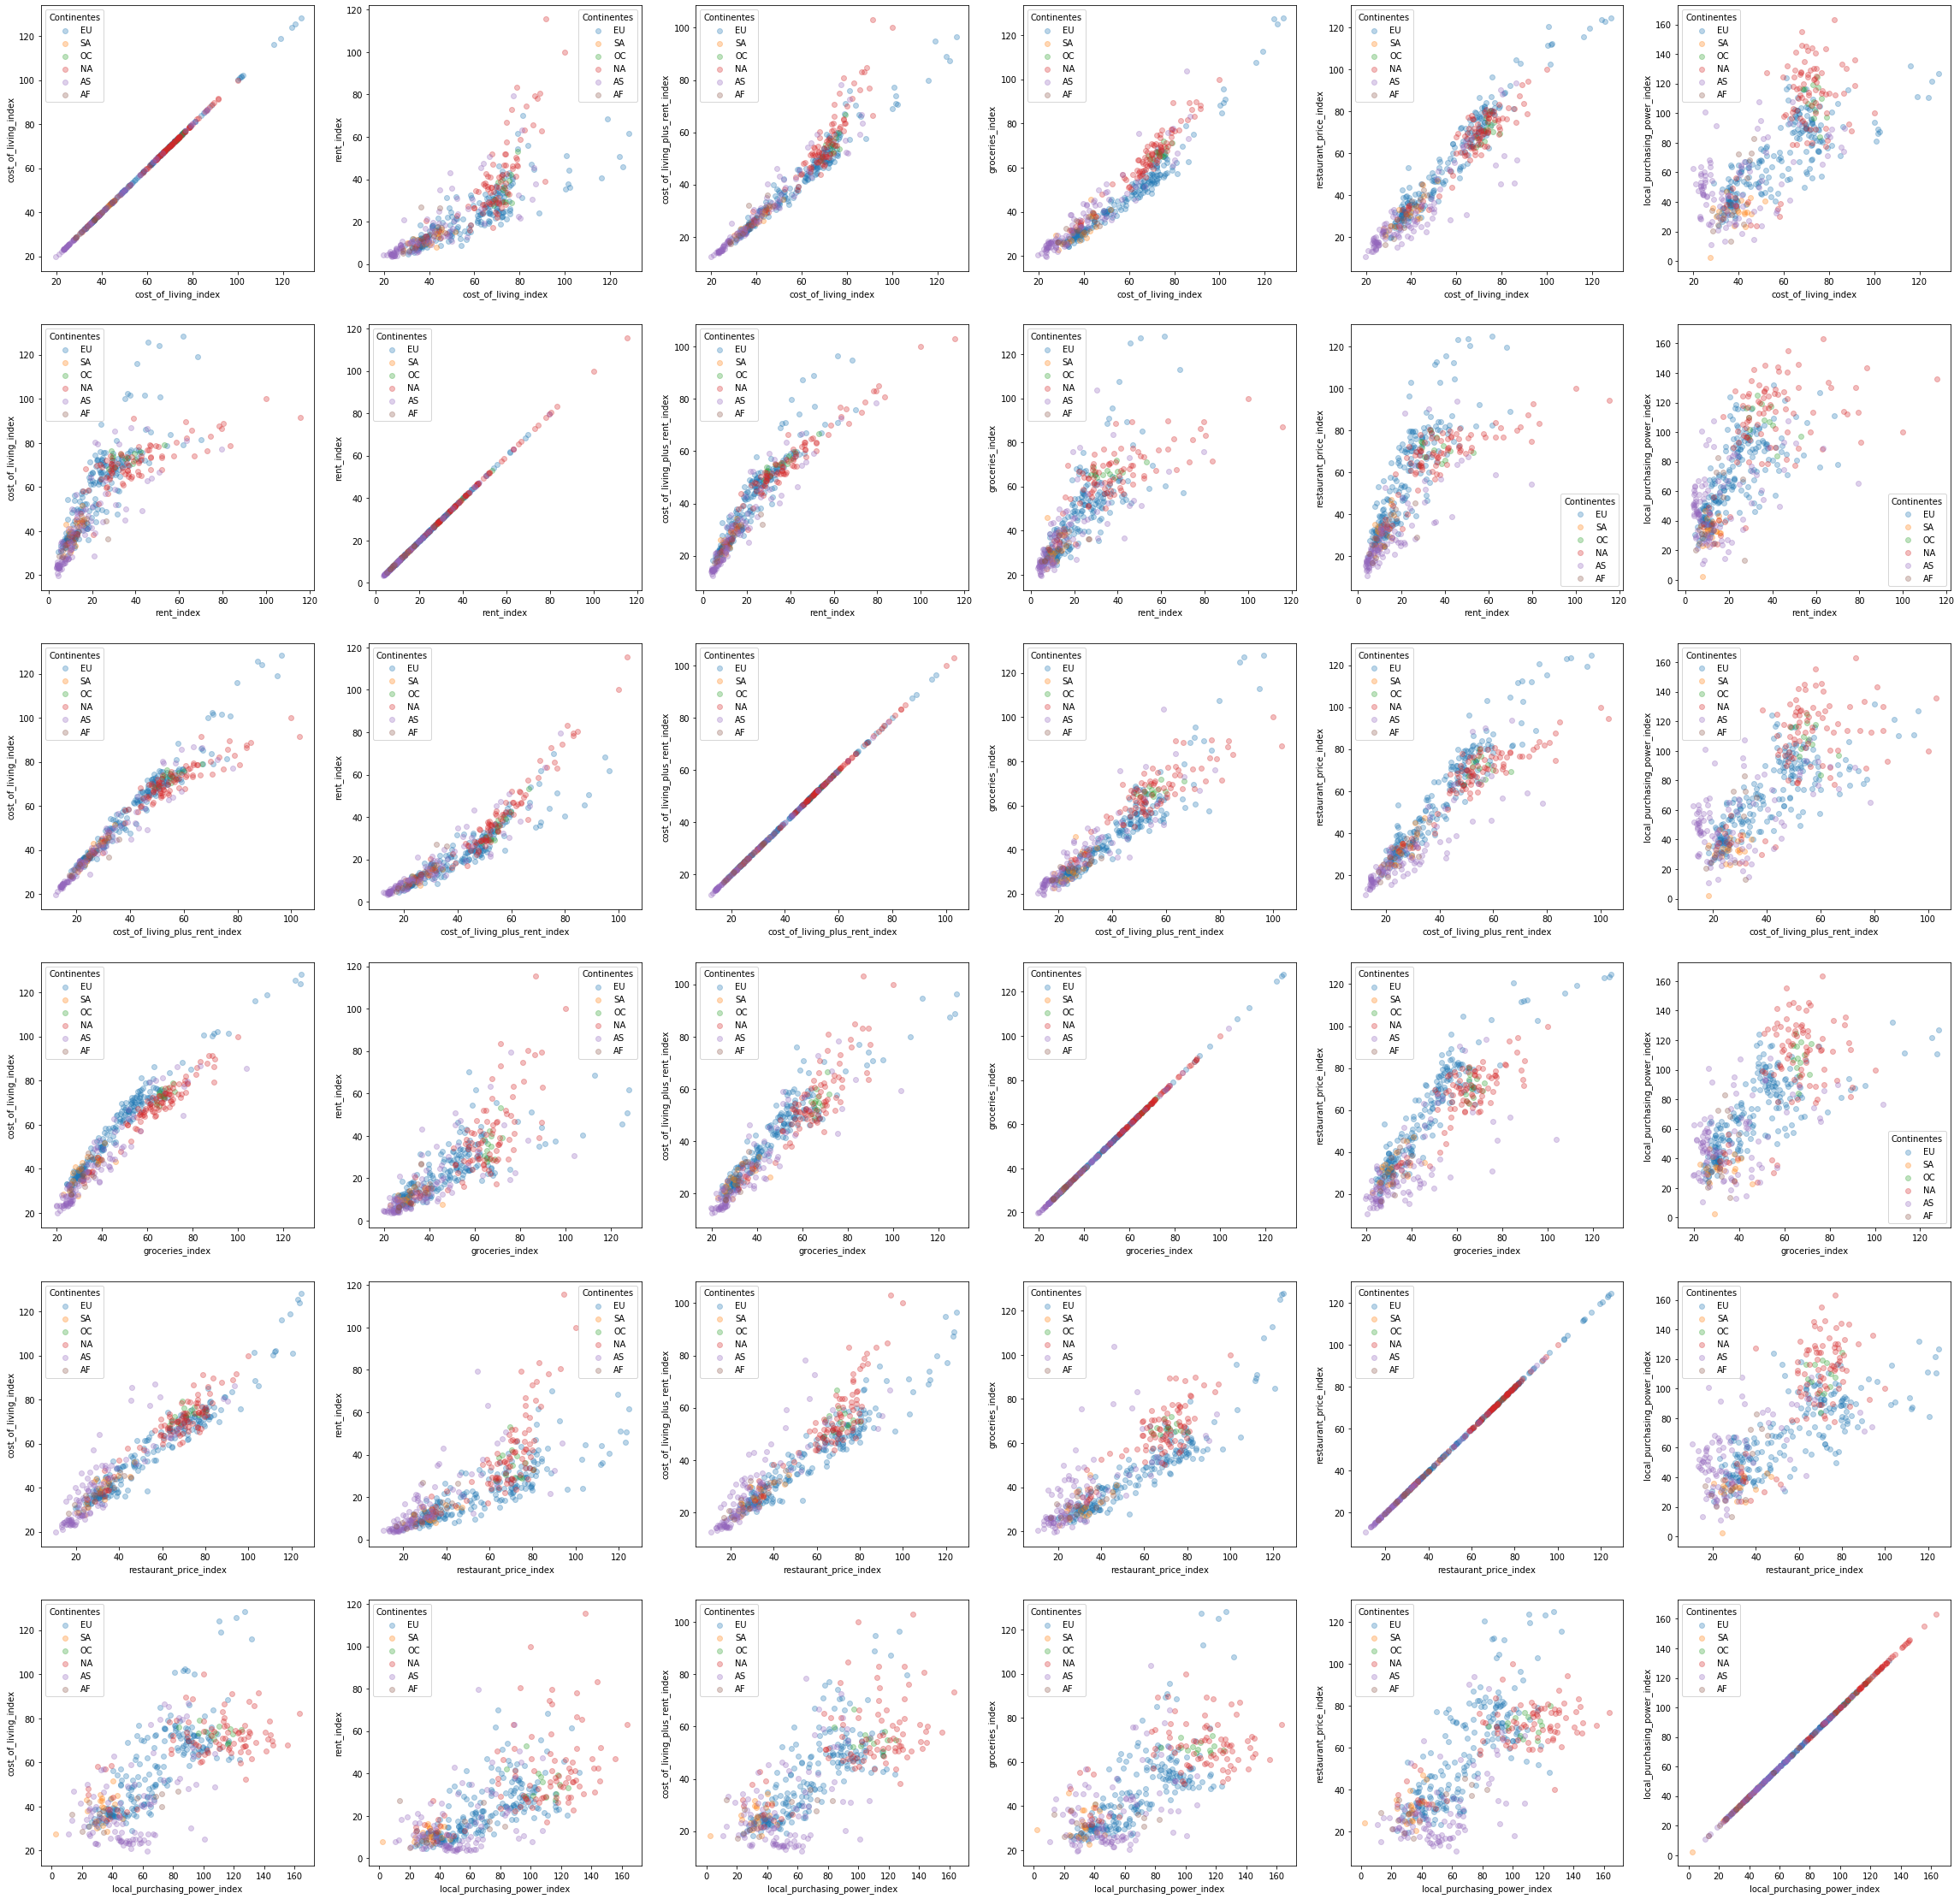

In [73]:
from itertools import product
fig = plt.figure(figsize=(40, 40)) # ventana
life_cost2020=lc[lc['year']==2020]
indexes=life_cost2020.columns[3:9]
j=0
for i in product(indexes,repeat= 2):
    j+=1
    for p in life_cost2020.continent.unique():
        plt.subplot(6,6,j)
        plt.scatter(
            life_cost2020[life_cost2020['continent']==p][i[0]], 
            life_cost2020[life_cost2020['continent']==p][i[1]], 
            cmap='tab20',
            alpha=0.3, # intensidad color
            label=p # etiquetdo fijando posicion
        )
    plt.legend(frameon=True, title='Continentes')
    plt.xlabel(str(i[0]))
    plt.ylabel(str(i[1]))
        
plt.show    
    
       